In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from linewidth import delta_theta, delta_f

<h1>Array Size vs. Element Pitch for 100urad Beam Divergence Across Plus/Minus Range</h1>

[6961, 6328, 5800, 5354, 4972, 4640, 4350, 4094, 3867, 3663, 3480, 3315, 3164, 3026, 2900, 2784, 2677, 2578, 2486, 2400, 2320, 2245, 2175, 2109, 2047, 1989, 1933, 1881, 1832, 1785, 1740, 1698, 1657, 1617, 1582, 1547]


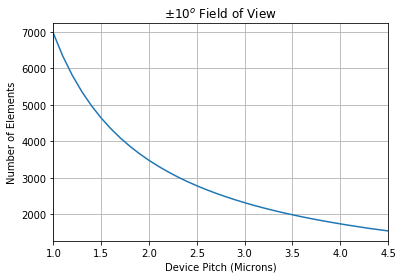

In [9]:
fname = 'numEl_vs_pitch_10deg'

data = pd.read_csv(f'data/{fname}.csv')
num_elements = list(data['Unquantized'])
pitch = list(data['Pitch'])
num_elements = [x//2 for x in num_elements]
print(num_elements)

plt.plot(pitch, num_elements)
plt.xlabel('Device Pitch (Microns)')
plt.ylabel('Number of Elements')
plt.title('$\pm$10$^o$ Field of View')
plt.xlim([min(pitch), max(pitch)])
plt.grid(True)
plt.savefig(f'data/{fname}.png')

<h1>Calculating Max Laser Linewidth for Dispersion</h1>

In [2]:
lambda_0 = 1550e-9
f_0 = 3e8/lambda_0
lambda_delta_vec = np.arange(0,10e-9,0.1e-9)
Lambda = 8.9e-6 # 8.9e-6/14.8e-6 for pm 10deg/6deg

lambda_delta_down = 0
lambda_delta_up = 0

for lambda_delta in lambda_delta_vec:
    theta_delta_down, theta_delta_up = delta_theta(1, lambda_0, lambda_delta, Lambda)
    if abs(theta_delta_down) < 100e-6:
        lambda_delta_down = lambda_delta
    if abs(theta_delta_up) < 100e-6:
        lambda_delta_up = lambda_delta
        
lambda_max = lambda_0 + lambda_delta_up
lambda_min = lambda_0 - lambda_delta_down

In [3]:
print(f'Min/Max: {lambda_min}/{lambda_max}')

Min/Max: 1.5492e-06/1.5508e-06


In [7]:
f_min = f_0 + delta_f(lambda_0, lambda_delta_up)
f_max = f_0 + delta_f(lambda_0, -lambda_delta_down)

In [13]:
print(f'Min/Max: {f_min*1e-12}/{f_max*1e-12} THz')
print((f_max-f_min)*1e-9)

Min/Max: 193.4485426876451/193.64833462432225 THz
199.79193667715626


8e-10